In [ ]:
#https://www.kaggle.com/subhassing/exploring-consumer-complaintdata/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing,linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import LogisticRegression


In [2]:
Data = pd.read_csv("Consumer_Complaints.csv",encoding='latin-1')

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Data.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [4]:
# Selecting required columns and rows

In [5]:
Data = Data[['product', 'consumer_complaint_narrative']]

In [6]:
Data.head()

,product,consumer_complaint_narrative
0,Mortgage,NaN
1,Mortgage,NaN
2,Credit reporting,NaN
3,Student loan,NaN
4,Debt collection,NaN


In [7]:
Data["product"].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [8]:
len(Data["product"].value_counts())

11

In [9]:
Data = Data[pd.notnull(Data['consumer_complaint_narrative'])]

In [10]:
Data.isnull().any()

product                         False
consumer_complaint_narrative    False
dtype: bool

In [11]:
Data.head()

,product,consumer_complaint_narrative
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...
190135,Consumer Loan,Due to inconsistencies in the amount owed that...
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...
190207,Mortgage,I have an open and current mortgage with Chase...
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...


In [12]:
# Factorizing the category column

In [13]:
Data['category_id'] = Data['product'].factorize()[0]

In [14]:
Data.head()

,product,consumer_complaint_narrative,category_id
190126,Debt collection,XXXX has claimed I owe them {$27.00} for XXXX ...,0
190135,Consumer Loan,Due to inconsistencies in the amount owed that...,1
190155,Mortgage,In XX/XX/XXXX my wages that I earned at my job...,2
190207,Mortgage,I have an open and current mortgage with Chase...,2
190208,Mortgage,XXXX was submitted XX/XX/XXXX. At the time I s...,2


In [15]:
# Check the distriution of complaints by category

In [16]:
Data.groupby('product').consumer_complaint_narrative.count()

product
Bank account or service     5711
Consumer Loan               3678
Credit card                 7929
Credit reporting           12526
Debt collection            17552
Money transfers              666
Mortgage                   14919
Other financial service      110
Payday loan                  726
Prepaid card                 861
Student loan                2128
Name: consumer_complaint_narrative, dtype: int64

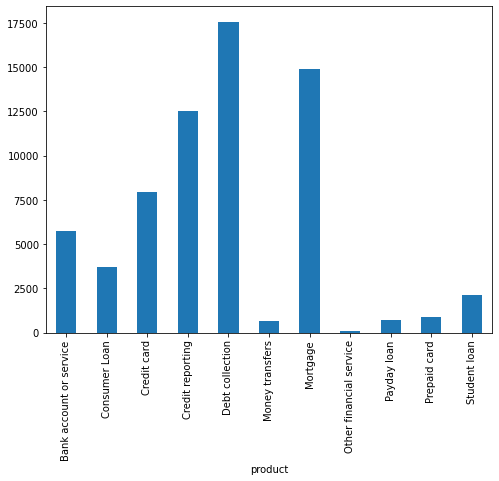

In [17]:
fig = plt.figure(figsize=(8,6))
Data.groupby('product').consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [18]:
# Debt collection and Mortgage have the highest number of complaints registered

In [19]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Data['consumer_complaint_narrative'], Data['product'])

In [20]:
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [21]:
train_y

array([4, 4, 2, ..., 4, 4, 4])

In [22]:
valid_y

array([0, 0, 3, ..., 4, 5, 4])

In [23]:
# Feature engineering using TF-IDF

In [24]:
tfidf_vect = TfidfVectorizer(analyzer='word',token_pattern=r'\w{1,}', max_features=5000)

In [25]:
tfidf_vect.fit(Data['consumer_complaint_narrative'])

TfidfVectorizer(max_features=5000, token_pattern='\\w{1,}')

In [26]:
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)

In [27]:
model = linear_model.LogisticRegression().fit(xtrain_tfidf, train_y)

C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
accuracy = metrics.accuracy_score(model.predict(xvalid_tfidf),valid_y)

In [29]:
confusion_matrix = metrics.confusion_matrix(valid_y,model.predict(xvalid_tfidf))

In [30]:
accuracy

0.8498383427134475

In [31]:
confusion_matrix

array([[1166,   13,   99,   30,   36,   16,   58,    0,    1,   26,    1],
       [  23,  579,   60,   64,  139,    2,   60,    0,   12,    1,    3],
       [  71,   13, 1634,   85,  165,    5,   21,    0,    0,    5,    0],
       [   9,   24,   70, 2755,  263,    0,   38,    0,    2,    0,   11],
       [  22,   50,   81,  198, 3846,    2,   72,    0,   14,    0,   31],
       [  37,    2,    9,    8,   18,   80,    5,    0,    0,    1,    0],
       [  29,   17,   24,   50,   69,    0, 3549,    0,    0,    0,    0],
       [   9,    0,    1,    3,    4,    2,    1,    0,    0,    0,    1],
       [  11,   31,    2,    8,   67,    0,    5,    0,   39,    0,    2],
       [  37,    2,   34,    2,    9,    4,    0,    0,    0,  139,    0],
       [   5,    7,    7,   10,   56,    0,   23,    0,    0,    0,  407]],
      dtype=int64)

In [32]:
print(metrics.classification_report(valid_y, model.predict(xvalid_tfidf),target_names=Data['product'].unique()))

                         precision    recall  f1-score   support

        Debt collection       0.82      0.81      0.81      1446
          Consumer Loan       0.78      0.61      0.69       943
               Mortgage       0.81      0.82      0.81      1999
            Credit card       0.86      0.87      0.86      3172
       Credit reporting       0.82      0.89      0.86      4316
           Student loan       0.72      0.50      0.59       160
Bank account or service       0.93      0.95      0.94      3738
            Payday loan       0.00      0.00      0.00        21
        Money transfers       0.57      0.24      0.33       165
Other financial service       0.81      0.61      0.70       227
           Prepaid card       0.89      0.79      0.84       515

               accuracy                           0.85     16702
              macro avg       0.73      0.64      0.68     16702
           weighted avg       0.85      0.85      0.85     16702



C:\Anaconda3\envs\nlpiaenv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Prediction example

In [34]:
texts = ["This company refuses to provide me verification and validation of debt"+ "per my right under the FDCPA. I do not believe this debt is mine."]

In [35]:
text_features = tfidf_vect.transform(texts)

In [36]:
predictions = model.predict(text_features)

In [37]:
category_id_df = Data[['product', 'category_id']].drop_duplicates().sort_values('category_id')

In [38]:
category_id_df.head()

,product,category_id
190126,Debt collection,0
190135,Consumer Loan,1
190155,Mortgage,2
190263,Credit card,3
191477,Credit reporting,4


In [39]:
id_to_category = dict(category_id_df[['category_id','product']].values)

In [40]:
id_to_category

{0: 'Debt collection',
 1: 'Consumer Loan',
 2: 'Mortgage',
 3: 'Credit card',
 4: 'Credit reporting',
 5: 'Student loan',
 6: 'Bank account or service',
 7: 'Payday loan',
 8: 'Money transfers',
 9: 'Other financial service',
 10: 'Prepaid card'}

In [41]:
print(" Texts Predicted as: '{}'".format(id_to_category[predictions[0]]))

 Texts Predicted as: 'Credit reporting'
